In [1]:

import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
import numpy as np
import datetime
import waterfall_chart

In [4]:
verra_df = pd.read_csv('../Data/VCU_Registry_Result_V2_5.2.22 copy.csv',
                      parse_dates = ['Issuance Date', 'Retirement/Cancellation Date', 'Vintage Start', 'Vintage End'])

In [5]:
verra_df.head()

,Issuance Date,Sustainable Development Goals,Vintage Start,Vintage End,ID,Name,Country,Project Type,Methodology,Total Vintage Quantity,Quantity Issued,Serial Number,Additional Certifications,Retirement/Cancellation Date,Retirement Beneficiary,Retirement Reason,Retirement Details
0,2022-04-29,NaN,2020-01-11,2020-12-31,682,"Wind Power Project at Anthiyur, Tamil Nadu",India,Energy industries (renewable/non-renewable sou...,AMS-I.D.,663,663,12990-464677897-464678559-VCS-VCU-997-VER-IN-1...,NaN,NaT,NaN,NaN,NaN
1,2022-04-29,NaN,2021-01-01,2021-08-31,682,"Wind Power Project at Anthiyur, Tamil Nadu",India,Energy industries (renewable/non-renewable sou...,AMS-I.D.,22486,22486,12991-464678560-464701045-VCS-VCU-997-VER-IN-1...,NaN,NaT,NaN,NaN,NaN
2,2022-04-29,NaN,2020-08-28,2020-12-31,1319,Small-Scale Hydropower Project Sahanivotry In ...,Madagascar,Energy industries (renewable/non-renewable sou...,ACM0002,4773,4773,12992-464701046-464705818-VCS-VCU-997-VER-MG-1...,NaN,NaT,NaN,NaN,NaN
3,2022-04-29,NaN,2021-01-01,2021-09-30,1319,Small-Scale Hydropower Project Sahanivotry In ...,Madagascar,Energy industries (renewable/non-renewable sou...,ACM0002,20747,20747,12993-464705819-464726565-VCS-VCU-997-VER-MG-1...,NaN,NaT,NaN,NaN,NaN
4,2022-04-29,NaN,2016-01-01,2016-12-31,1408,Chyulu Hills REDD+ Project,Kenya,Agriculture Forestry and Other Land Use,VM0009,617707,70000,12994-464726566-464796565-VCS-VCU-263-VER-KE-1...,CCB-Biodiversity Gold; CCB-Climate Gold; CCB-C...,NaT,NaN,NaN,NaN


First, cleaning column names

In [6]:
#getting rid of spaces and slashes
verra_df.columns = verra_df.columns.str.replace("\/| |\.", '_', regex = True)
verra_df.columns = verra_df.columns.str.lower()

In [7]:
verra_df.columns

Index(['issuance_date', 'sustainable_development_goals', 'vintage_start',
       'vintage_end', 'id', 'name', 'country', 'project_type', 'methodology',
       'total_vintage_quantity', 'quantity_issued', 'serial_number',
       'additional_certifications', 'retirement_cancellation_date',
       'retirement_beneficiary', 'retirement_reason', 'retirement_details'],
      dtype='object')

In [8]:
verra_df.loc[verra_df['quantity_issued'].isnull()]

,issuance_date,sustainable_development_goals,vintage_start,vintage_end,id,name,country,project_type,methodology,total_vintage_quantity,quantity_issued,serial_number,additional_certifications,retirement_cancellation_date,retirement_beneficiary,retirement_reason,retirement_details


In [9]:
verra_df = verra_df.loc[verra_df['quantity_issued'].notnull()]

In [10]:
verra_df.sort_values(by='quantity_issued',
                    ascending=False,
                    inplace=True)

In [11]:
verra_df.head()

,issuance_date,sustainable_development_goals,vintage_start,vintage_end,id,name,country,project_type,methodology,total_vintage_quantity,quantity_issued,serial_number,additional_certifications,retirement_cancellation_date,retirement_beneficiary,retirement_reason,retirement_details
49538,2019-05-21,NaN,2016-01-01,2017-12-31,1566,REDD+ Project Resguardo Indigena Unificado Sel...,Colombia,Agriculture Forestry and Other Land Use,VM0007,6404775,5250000,6709-333713222-338963221-VCU-048-APX-CO-14-156...,NaN,2019-05-21,PRIMAX COLOMBIA S.A identificada con Nit: 860....,Compliance Requirements,PRIMAX COLOMBIA S.A identificada con Nit: 860....
3735,2021-09-20,NaN,2016-01-01,2019-12-31,1340,Bale Mountains Eco-region REDD+ project,Ethiopia,Agriculture Forestry and Other Land Use,VM0015,4438780,2850000,11279-306091154-308941153-VCS-VCU-1507-VER-ET-...,CCB-Gold,NaT,NaN,NaN,NaN
23210,2020-12-30,NaN,2019-01-01,2019-12-31,1742,Hydroelectric Project in Kinnaur District in H...,India,Energy industries (renewable/non-renewable sou...,ACM0002,3683633,2720135,9375-88987455-91707589-VCS-VCU-997-VER-IN-1-17...,NaN,NaT,NaN,NaN,NaN
54209,2018-06-12,NaN,2010-01-11,2015-10-31,1477,Katingan Peatland Restoration and Conservation...,Indonesia,Agriculture Forestry and Other Land Use,VM0007,14165124,2539496,6250-289727777-292267272-VCU-006-APX-ID-14-147...,CCB-Gold,NaT,NaN,NaN,NaN
269,2022-03-31,NaN,2017-01-01,2017-12-31,934,The Mai Ndombe REDD+ Project,"Congo, The Democratic Republic of The",Agriculture Forestry and Other Land Use,VM0009,4574504,2350000,12787-437069438-439419437-VCS-VCU-259-VER-CD-1...,CCB-Biodiversity Gold; CCB-Climate Gold,NaT,NaN,NaN,NaN


In [12]:
verra_df['issuance_year'] = pd.DatetimeIndex(verra_df['issuance_date']).year
verra_df['retirement_year'] = pd.DatetimeIndex(verra_df['retirement_cancellation_date']).year

In [13]:
issuance_by_year = verra_df[['issuance_year','quantity_issued']]

In [14]:
issuance_by_year = issuance_by_year.groupby('issuance_year').sum()

issuance_by_year.reset_index(inplace=True)

In [15]:
issuance_by_year

,issuance_year,quantity_issued
0,2009,20731991
1,2010,24014316
2,2011,24153406
3,2012,33844512
4,2013,28742372
5,2014,17939993
6,2015,20401187
7,2016,18137466
8,2017,43489634
9,2018,49565842


In [16]:
retirement_by_year = verra_df[['retirement_year','quantity_issued']]

In [17]:
retirement_by_year = retirement_by_year.groupby('retirement_year').sum()

retirement_by_year.reset_index(inplace=True)

In [18]:
retirement_by_year

,retirement_year,quantity_issued
0,2009.0,1832011
1,2010.0,4352778
2,2011.0,8088160
3,2012.0,14513461
4,2013.0,23995524
5,2014.0,22090240
6,2015.0,26461819
7,2016.0,20720016
8,2017.0,29684548
9,2018.0,36701038


In [19]:
supply_df = issuance_by_year.copy()

In [20]:
supply_df['supply_eoy'] = supply_df['quantity_issued'] - retirement_by_year['quantity_issued']

In [21]:
supply_df

,issuance_year,quantity_issued,supply_eoy
0,2009,20731991,18899980
1,2010,24014316,19661538
2,2011,24153406,16065246
3,2012,33844512,19331051
4,2013,28742372,4746848
5,2014,17939993,-4150247
6,2015,20401187,-6060632
7,2016,18137466,-2582550
8,2017,43489634,13805086
9,2018,49565842,12864804


In [22]:
new_row = {'issuance_year':'Net',
           'quantity_issued':supply_df.quantity_issued.sum(),
           'supply_eoy':supply_df.supply_eoy.sum()}
#append row to the dataframe
supply_df = supply_df.append(new_row, ignore_index=True)

In [23]:
supply_df

,issuance_year,quantity_issued,supply_eoy
0,2009,20731991,18899980
1,2010,24014316,19661538
2,2011,24153406,16065246
3,2012,33844512,19331051
4,2013,28742372,4746848
5,2014,17939993,-4150247
6,2015,20401187,-6060632
7,2016,18137466,-2582550
8,2017,43489634,13805086
9,2018,49565842,12864804


In [24]:
issuance_year_list = list(supply_df['issuance_year'][:13])

credit_supply_list = list(supply_df['supply_eoy'][:13])

In [25]:
issuance_year_list = [str(x) for x in issuance_year_list]

In [26]:
credit_supply_list = [int(x)/1000000 for x in credit_supply_list]

<module 'matplotlib.pyplot' from '/Users/charlielosche/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

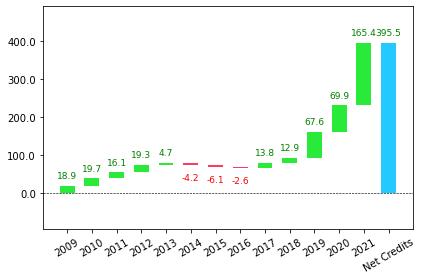

In [27]:
waterfall_chart.plot(issuance_year_list, credit_supply_list,
                     net_label='Net Credits')